# Phys555 Assignment 1 Question 1

Q1- Use PCA for the alfalfa and wine data set. Plot the explained variance ratio vs. the principle components for each data set.  
- Explanation of the problem and data as an introduction (2 points)
- Informative plots, the caption, labels, the explanations (2 points)
- Explaining/discussing the results (2 points)
- Coherence and informative cells: clear code with a very short explanation to follow the code (2 points)
- Conclusion/references (2 points)

## Alfalfa Dataset

In [1]:
# QUESTIONS: 
# Do we need to do anything with the redshift part of this? Or the target alfalfa file? 

# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

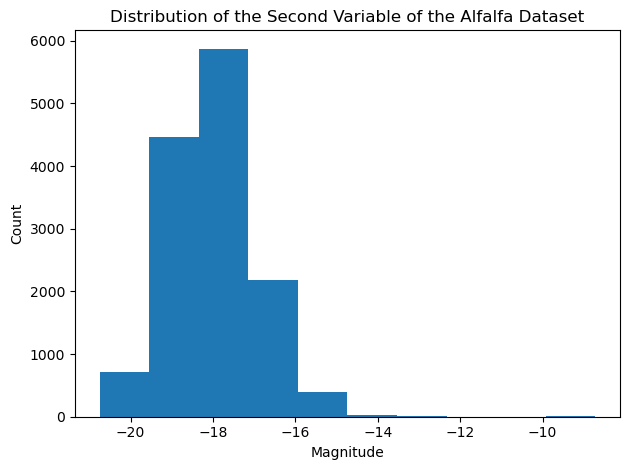

(13674, 15)

In [87]:
# Load the alfalfa dataset
inp_alf= np.load('inp_alfalfa.npy')

# Plot a histogram of the second variable within the dataset as an example
plt.hist(inp_alf[:,1])
plt.ylabel('Count')
plt.xlabel('Magnitude')
plt.title('Distribution of the Second Variable of the Alfalfa Dataset')
plt.tight_layout()
plt.show()

# Print the shape of the dataset to determine the total number of entries and columns
np.shape(inp_alf)

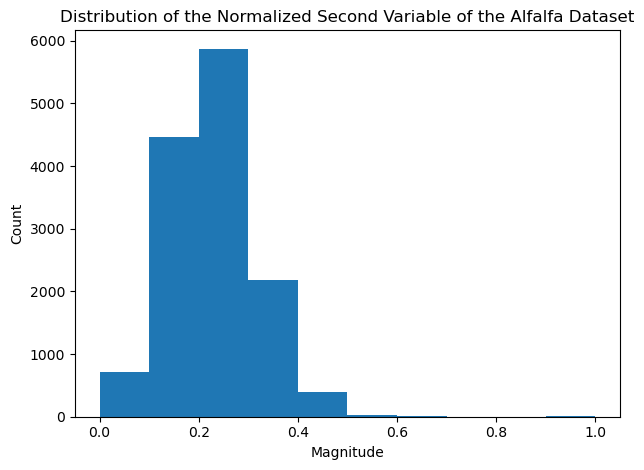

(13674, 15)

In [90]:
# Initialize the scikit learn "MinMaxScaler" preprocessing estimator, which scales and translates each feature of the dataset individually
# such that it is within the given range of the training set. In this case, the range is 0 to 1.
sc = MinMaxScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(inp_alf)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
inp_alf_norm = sc.transform(inp_alf)

# Plot the same histogram again, to visualize it's shape and range to confirm the transform was done correctly. 
# I prefer to look at them plotted overtop of each other, for easier confirmation that the shape has remained the same. 
plt.hist(inp_alf_norm[:,1])
plt.ylabel('Count')
plt.xlabel('Magnitude')
plt.title('Distribution of the Normalized Second Variable of the Alfalfa Dataset')
plt.tight_layout()
plt.show()
#plt.hist(inp_alf[:,1])

# Print the shape of the dataset to ensure no information was lost.
np.shape(inp_alf_norm)

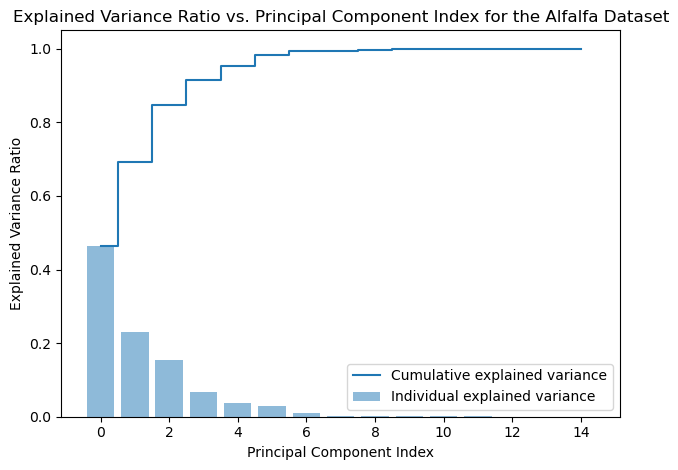

In [91]:
# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
inp_alf_pca = pca.fit_transform(inp_alf_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Alfalfa Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Discussion

# Wine Dataset

In [42]:
# Load the red wine csv 
red = pd.read_csv('winequality-red.csv', sep=';')

# Create a new variable to flag red vs white wine for distinction when combining data. Label red as "1". 
red['red_vs_white'] = 1

# Load the white wine csv 
white = pd.read_csv('winequality-white.csv', sep=';')

# Create a new variable to flag red vs white wine for distinction when combining data. Label white as "0". 
white['red_vs_white'] =  0

# To ensure the datasets have the same values (ie. when appending no NaNs are present), print the column names 
red_columns = list(red.columns.values)
print(red_columns)
white_columns = list(white.columns.values)
print(white_columns)

# Print the shape of the red wine dataset 
print(np.shape(red))

# Print the shape of the white wine dataset
print(np.shape(white))

# Append the red and white wines together
all_wines = red.append(white)

# Print the shape of the appended datasets to ensure that all data was retained.
print(np.shape(all_wines))

# Check for NaNs in appended dataset (the readme says there aren't, but good to check)
all_wines.isnull().values.any()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'red_vs_white']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'red_vs_white']
(1599, 13)
(4898, 13)
(6497, 13)


False

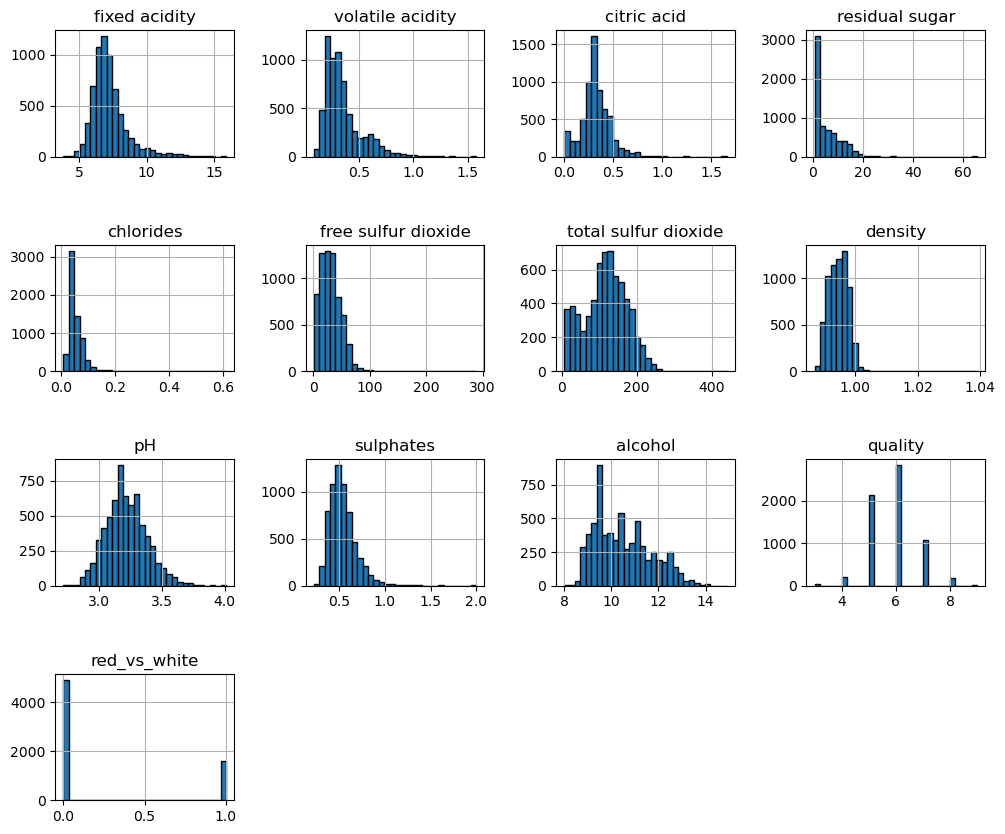

In [23]:
# Plot histograms of the appended data
all_wines.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The PCA analysis will be skewed towards white wines, as there are more white than red wines contained in the dataset, as visible in the "red_vs_white" histogram.

(6497, 13)
(6497, 13)


Text(0.5, 1.0, 'Original Data and Transformed Data: Displaying Normalization')

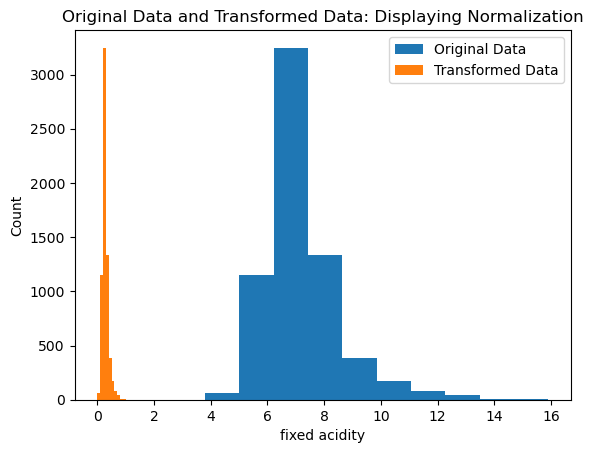

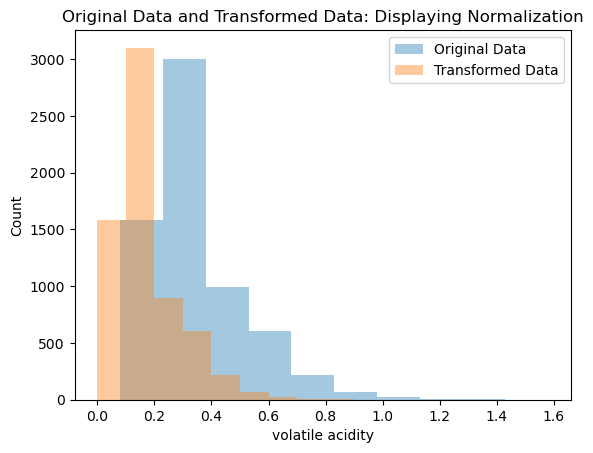

In [84]:
# Call the same MinMaxScaler preprocessing estimator as was defined in the alfalfa dataset, and retrain it on the wine dataset.
sc.fit(all_wines)

# Transform the wine data with the trained MinMaxScaler estimator. 
all_wines_norm = sc.transform(all_wines)

print(np.shape(all_wines_norm))
print(np.shape(all_wines))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel(str(all_wines.columns[0]))
ax.set_ylabel('Count');
ax.hist(all_wines.iloc[:,0])
ax.hist(all_wines_norm[:,0])
ax.legend(('Original Data', 'Transformed Data'), loc='upper right');
plt.title('Original Data and Transformed Data: Displaying Normalization')

fig2, ax2 = plt.subplots(1, 1)
ax2.set_xlabel(str(all_wines.columns[1]))
ax2.set_ylabel('Count');
ax2.hist(all_wines.iloc[:,1], alpha=0.4)
ax2.hist(all_wines_norm[:,1], alpha=0.4)
ax2.legend(('Original Data', 'Transformed Data'), loc='upper right');
plt.title('Original Data and Transformed Data: Displaying Normalization')


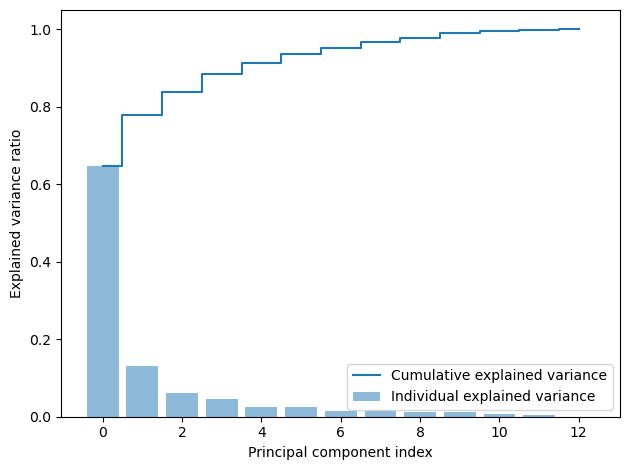

In [26]:
pca = PCA()

# Determine transformed features
wines_pca = pca.fit_transform(all_wines_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Discussion

# Conclusion

## References
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html